#  WeatherPy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
from datetime import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

606

# Perform API Calls

Perform a weather check on each city using a series of successive API calls.
Include a print log of each city as it'sbeing processed (with the city number and city name).

In [3]:
# Establish base URL to test a city
url = "http://api.openweathermap.org/data/2.5/weather?"
city = "Boston"


# Build query URL
query_url = url + "q=" + city + "&units=imperial" + "&appid=" + weather_api_key

In [4]:
# Check that API Key is working
weather_api_key

'67f3518c2599ae046961d6e603a09e16'

In [5]:
# Test a random city
weather_response = requests.get(query_url)
weather_json = weather_response.json()
weather_json

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 15.04,
  'feels_like': 1.4,
  'temp_min': 12.99,
  'temp_max': 17.01,
  'pressure': 1011,
  'humidity': 49},
 'visibility': 10000,
 'wind': {'speed': 13, 'deg': 340, 'gust': 30},
 'clouds': {'all': 80},
 'dt': 1611942960,
 'sys': {'type': 3,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1611921635,
  'sunset': 1611957245},
 'timezone': -18000,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [6]:
# Create empty lists to hold the temperature, humidity, cloudiness, and wind speeds of each city 
max_temperature = []
humidity = []
cloudiness = []
wind_speed = []
latitude = []
longitude = []
city_names = []
country = []
date = []

for city in cities:
    url = "http://api.openweathermap.org/data/2.5/weather?"
    query_url = url + "q=" + city + "&units=imperial" + "&appid=" + weather_api_key
    weather_response = requests.get(query_url).json()
    
    try: 
        max_temperature.append(weather_response['main']['temp_max'])
        humidity.append(weather_response['main']['humidity'])
        cloudiness.append(weather_response['clouds']['all'])
        wind_speed.append(weather_response['wind']['speed'])
        latitude.append(weather_response['coord']['lat'])
        longitude.append(weather_response['coord']['lon'])
        country.append(weather_response['sys']['country'])
        date.append(weather_response['dt'])
        city_names.append(weather_response['name'])
        print(f"Processing Record {city}")
        
    except:
        print("City not found. Skipping")
        pass

Processing Record zarichne
Processing Record mataura
Processing Record ushuaia
Processing Record new norfolk
Processing Record busselton
Processing Record georgetown
Processing Record cape town
Processing Record olga
Processing Record horsham
Processing Record peniche
Processing Record labuan
Processing Record shagonar
Processing Record barrow
Processing Record bonavista
City not found. Skipping
Processing Record airai
City not found. Skipping
Processing Record vaini
Processing Record tasiilaq
Processing Record hithadhoo
Processing Record loukhi
Processing Record colac
Processing Record albany
Processing Record pevek
City not found. Skipping
Processing Record upernavik
Processing Record bredasdorp
City not found. Skipping
City not found. Skipping
Processing Record hermanus
Processing Record manicore
Processing Record sakakah
Processing Record along
Processing Record puerto ayora
Processing Record pimentel
Processing Record paita
Processing Record bengkulu
Processing Record ahipara
Proc

Processing Record stornoway
Processing Record kafue
Processing Record talara
Processing Record anamur
Processing Record mogadishu
Processing Record yatou
Processing Record teruel
City not found. Skipping
Processing Record belyy gorodok
Processing Record portland
Processing Record yar-sale
Processing Record syracuse
Processing Record clyde river
Processing Record medea
Processing Record ginda
Processing Record trairi
City not found. Skipping
Processing Record kosa
Processing Record pangody
Processing Record saint-leu
Processing Record thaba-tseka
Processing Record cheremukhovo
Processing Record puri
Processing Record abha
Processing Record miyako
Processing Record rio gallegos
Processing Record mahebourg
Processing Record suez
Processing Record mehran
Processing Record marathon
Processing Record karakol
Processing Record chapais
Processing Record chicama
City not found. Skipping
Processing Record komsomolskiy
Processing Record karasjok
Processing Record lukulu
Processing Record ribeira 

# Convert Raw Data to DataFrame

Export the city data into a .csv.
Display the DataFrame

In [7]:
# Make sure array lengths match
print(len(city_names))
print(len(latitude))
print(len(longitude))
print(len(max_temperature))
print(len(humidity))
print(len(cloudiness))
print(len(wind_speed))
print(len(country))
print(len(date))

561
561
561
561
561
561
561
561
561


In [8]:
# Create new Data Frame with data
weather_df = pd.DataFrame({'City': city_names,
                           'Latitude': latitude,
                           'Longitude': longitude,
                           'Max Temp': max_temperature,
                           'Humidity': humidity,
                           'Cloudiness': cloudiness,
                           'Wind Speed': wind_speed,
                           'Country': country,
                           'Date': date})
weather_df

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Zarichne,51.8126,26.1290,22.96,98,89,7.87,UA,1611943092
1,Mataura,-46.1927,168.8643,39.43,95,32,1.90,NZ,1611943092
2,Ushuaia,-54.8000,-68.3000,39.20,65,75,25.32,AR,1611942995
3,New Norfolk,-42.7826,147.0587,61.00,83,76,1.92,AU,1611942498
4,Busselton,-33.6500,115.3333,64.00,80,0,3.00,AU,1611943093
...,...,...,...,...,...,...,...,...,...
556,Ust-Nera,64.5667,143.2000,-16.24,79,100,2.71,RU,1611943173
557,Rumoi,43.9344,141.6428,26.42,94,100,8.93,JP,1611943173
558,Upata,8.0086,-62.3989,88.00,60,62,3.00,VE,1611943173
559,Sumbe,-11.2061,13.8437,78.39,77,9,9.57,AO,1611943173


In [9]:
# Get summary statistics
weather_df.describe()

,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,561.000000,561.000000,561.000000,561.00000,561.000000,561.000000,5.610000e+02
mean,18.434561,18.460603,51.350321,71.27451,50.973262,8.542442,1.611943e+09
std,32.492451,90.185920,34.544237,19.70287,38.709647,5.657807,2.161409e+02
min,-54.800000,-175.200000,-49.700000,10.00000,0.000000,0.070000,1.611942e+09
25%,-7.026800,-59.783300,33.800000,61.00000,11.000000,4.470000,1.611943e+09
50%,20.508300,23.433300,62.600000,77.00000,50.000000,7.380000,1.611943e+09
75%,45.216700,97.823500,78.460000,86.00000,90.000000,11.500000,1.611943e+09
max,78.218600,178.416700,99.050000,100.00000,100.000000,32.210000,1.611943e+09


In [10]:
# Create the output File (CSV)
weather_df_csv = "WeatherPy.csv"

# Export the city_data into a csv
weather_df.to_csv(weather_df_csv, index_label="City_ID")

#  Inspect the data and remove the cities where the humidity > 100%.
Skip this step if there are no cities that have humidity > 100%.

In [11]:
#  Create a new DataFrame only with cities that have humidity less than or equal to 100% 
humidity_df = weather_df[weather_df["Humidity"] <= 100]
humidity_df

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Zarichne,51.8126,26.1290,22.96,98,89,7.87,UA,1611943092
1,Mataura,-46.1927,168.8643,39.43,95,32,1.90,NZ,1611943092
2,Ushuaia,-54.8000,-68.3000,39.20,65,75,25.32,AR,1611942995
3,New Norfolk,-42.7826,147.0587,61.00,83,76,1.92,AU,1611942498
4,Busselton,-33.6500,115.3333,64.00,80,0,3.00,AU,1611943093
...,...,...,...,...,...,...,...,...,...
556,Ust-Nera,64.5667,143.2000,-16.24,79,100,2.71,RU,1611943173
557,Rumoi,43.9344,141.6428,26.42,94,100,8.93,JP,1611943173
558,Upata,8.0086,-62.3989,88.00,60,62,3.00,VE,1611943173
559,Sumbe,-11.2061,13.8437,78.39,77,9,9.57,AO,1611943173


In [12]:
# Get summary statistics
humidity_df.describe()

,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,561.000000,561.000000,561.000000,561.00000,561.000000,561.000000,5.610000e+02
mean,18.434561,18.460603,51.350321,71.27451,50.973262,8.542442,1.611943e+09
std,32.492451,90.185920,34.544237,19.70287,38.709647,5.657807,2.161409e+02
min,-54.800000,-175.200000,-49.700000,10.00000,0.000000,0.070000,1.611942e+09
25%,-7.026800,-59.783300,33.800000,61.00000,11.000000,4.470000,1.611943e+09
50%,20.508300,23.433300,62.600000,77.00000,50.000000,7.380000,1.611943e+09
75%,45.216700,97.823500,78.460000,86.00000,90.000000,11.500000,1.611943e+09
max,78.218600,178.416700,99.050000,100.00000,100.000000,32.210000,1.611943e+09


# Plotting the Data

Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
Save the plotted figures as .pngs.

#  Latitude vs. Temperature Plot

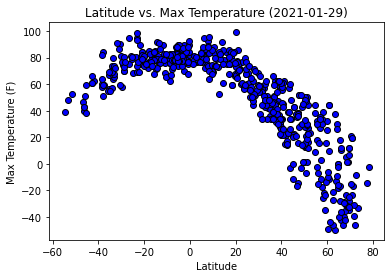

In [13]:
# Pull out the latitude and temperature
latitude_scatter = humidity_df["Latitude"]
temperature_scatter = humidity_df["Max Temp"]

# Plot the results in a scatter plot
plt.scatter(latitude_scatter, temperature_scatter, edgecolors = 'black', color = 'blue')

# Find date and fix formatting
weather_date = datetime.fromtimestamp(humidity_df.loc[0,"Date"]).strftime('%Y-%m-%d')

# Add title and labels
plt.title(f"Latitude vs. Max Temperature ({weather_date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")



# Save as png
plt.savefig("Lat_Temp.png")

This graph is analyzing the relationship between latitude and temperature. Based on the scatter plot returned, temperature is affected by distance from the equator, so as you move further away from it, the temperature decreases. 

#  Latitude vs. Humidity Plot

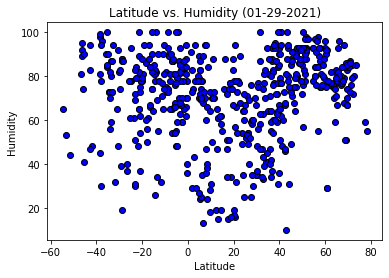

In [14]:
# Pull out the latitude and temperature
latitude_scatter = humidity_df["Latitude"]
humidity_scatter = humidity_df["Humidity"]

# Plot the results in a scatter plot
plt.scatter(latitude_scatter, humidity_scatter, edgecolors = 'black', color = 'blue')

# Find date and fix formatting
weather_date = datetime.fromtimestamp(humidity_df.loc[0,"Date"]).strftime('%m-%d-%Y')

# Add title and labels
plt.title(f"Latitude vs. Humidity ({weather_date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Save as png
plt.savefig("Lat_Hum.png")

This graph is analyzing the relationship between latitude and humidity. Based on the scatter plot returned, there is no clear relationship between the two variables. 

# Latitude vs. Cloudiness Plot

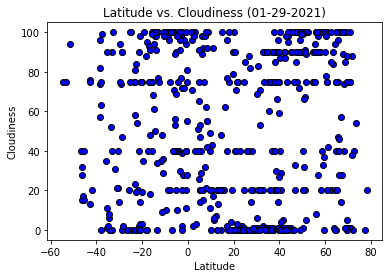

In [15]:
# Pull out the latitude and temperature
latitude_scatter = humidity_df["Latitude"]
cloudiness_scatter = humidity_df["Cloudiness"]

# Plot the results in a scatter plot
plt.scatter(latitude_scatter, cloudiness_scatter, edgecolors = 'black', color = 'blue')

# Find date and fix formatting
weather_date = datetime.fromtimestamp(humidity_df.loc[0,"Date"]).strftime('%m-%d-%Y')

# Add title and labels
plt.title(f"Latitude vs. Cloudiness ({weather_date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Save as png
plt.savefig("Lat_Cloud.png")

This graph is analyzing the relationship between latitude and cloudiness. Based on the scatter plot returned, there is no clear relationship between the two variables.

# Latitude vs. Wind Speed Plot

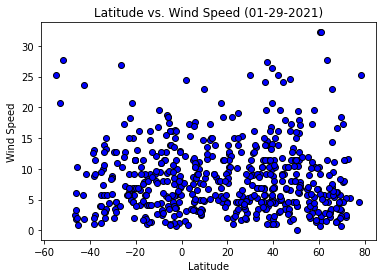

In [16]:
# Pull out the latitude and temperature
latitude_scatter = humidity_df["Latitude"]
wind_scatter = humidity_df["Wind Speed"]

# Plot the results in a scatter plot
plt.scatter(latitude_scatter, wind_scatter, edgecolors = 'black', color = 'blue')

# Find date and fix formatting
weather_date = datetime.fromtimestamp(humidity_df.loc[0,"Date"]).strftime('%m-%d-%Y')

# Add title and labels
plt.title(f"Latitude vs. Wind Speed ({weather_date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Save as png
plt.savefig("Lat_Wind.png")

This graph is analyzing the relationship between latitude and wind speed. Based on the scatter plot returned, there is no clear relationship between the two variables.

#  Linear Regression

In [17]:
# Create new dataframes for northern and southern hemispheres
northern_hem_df = humidity_df[humidity_df["Latitude"] >= 0] 
southern_hem_df = humidity_df[humidity_df["Latitude"] <= 0]

#  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared value is 0.7719701183374726


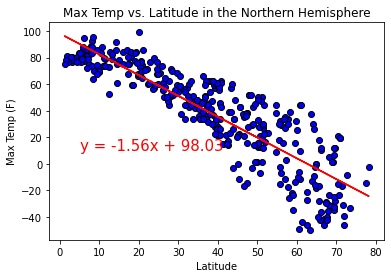

<Figure size 432x288 with 0 Axes>

In [18]:
# Find the linear regression model
northern_latitude = northern_hem_df["Latitude"]
northern_max_temp = northern_hem_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_latitude, northern_max_temp)
regress_values = northern_latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the results in a scatter plot
plt.scatter(northern_latitude, northern_max_temp, edgecolors = 'black', color = 'blue')
plt.plot(northern_latitude,regress_values,"r-", color = "red")
plt.annotate(line_eq, (5,10), fontsize=15, color ="red")
plt.title("Max Temp vs. Latitude in the Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
print(f"The r-squared value is {rvalue**2}")
plt.show()

# Save as png
plt.savefig("Nor_Lat_Temp.png")

This linear regression model is showing that there is a strong negative relationship between latitude and temperature in the northern hemisphere. Since the r-squared value is 0.76, this indicates that the model shown is a good fit for the data set, meaning that the data points are falling close to the fitted regression line. 

# Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared value is 0.4208586136563453


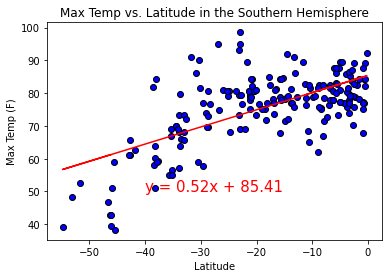

<Figure size 432x288 with 0 Axes>

In [19]:
# Find the linear regression model
southern_latitude = southern_hem_df["Latitude"]
southern_max_temp = southern_hem_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_latitude, southern_max_temp)
regress_values = southern_latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the results in a scatter plot
plt.scatter(southern_latitude, southern_max_temp, edgecolors = 'black', color = 'blue')
plt.plot(southern_latitude,regress_values,"r-", color = "red")
plt.annotate(line_eq, (-40,50), fontsize=15, color ="red")
plt.title("Max Temp vs. Latitude in the Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
print(f"The r-squared value is {rvalue**2}")
plt.show()

# Save as png
plt.savefig("Sou_Lat_Temp.png")

This linear regression model is showing that there is a positive relationship between latitude and temperature in the southern hemisphere. Since the r-squared value is 0.43, this indicates that the model shown is an ok fit for the data set, meaning that some data points are falling close to the fitted regression line. 

# Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared value is 0.15455125603648687


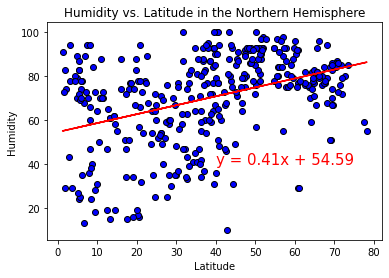

<Figure size 432x288 with 0 Axes>

In [20]:
# Find the linear regression model
northern_latitude = northern_hem_df["Latitude"]
northern_humidity = northern_hem_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_latitude, northern_humidity)
regress_values = northern_latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the results in a scatter plot
plt.scatter(northern_latitude, northern_humidity, edgecolors = 'black', color = 'blue')
plt.plot(northern_latitude,regress_values,"r-", color = "red")
plt.annotate(line_eq, (40,40), fontsize=15, color ="red")
plt.title("Humidity vs. Latitude in the Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-squared value is {rvalue**2}")
plt.show()

# Save as png
plt.savefig("Nor_Lat_Hum.png")

This linear regression model is showing that there is a positive relationship between latitude and humidity in the northern hemisphere. Since the r-squared value is 0.18, this indicates that the model shown is not a good fit for the data set, meaning that the majority of data points are not falling close to the fitted regression line. 

# Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared value is 0.0011627205845512352


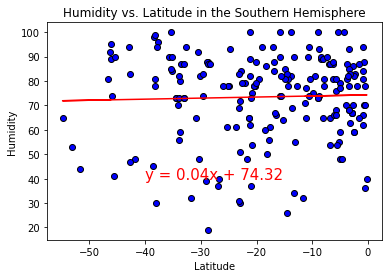

<Figure size 432x288 with 0 Axes>

In [21]:
# Find the linear regression model
southern_latitude = southern_hem_df["Latitude"]
southern_humidity = southern_hem_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_latitude, southern_humidity)
regress_values = southern_latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the results in a scatter plot
plt.scatter(southern_latitude, southern_humidity, edgecolors = 'black', color = 'blue')
plt.plot(southern_latitude,regress_values,"r-", color = "red")
plt.annotate(line_eq, (-40,40), fontsize=15, color ="red")
plt.title("Humidity vs. Latitude in the Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-squared value is {rvalue**2}")
plt.show()

# Save as png
plt.savefig("Sou_Lat_Hum.png")

This linear regression model is showing that there is a positive relationship between latitude and humidity in the southern hemisphere. Since the r-squared value is 0.03, this indicates that the model shown is not a good fit for the data set, meaning that the majority of data points are not falling close to the fitted regression line.

# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared value is 0.037621149420011706


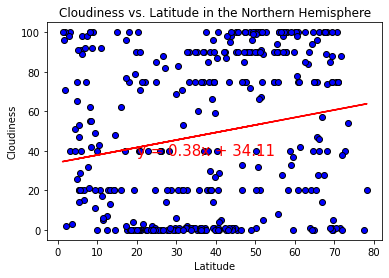

<Figure size 432x288 with 0 Axes>

In [22]:
# Find the linear regression model
northern_latitude = northern_hem_df["Latitude"]
northern_cloudiness = northern_hem_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_latitude, northern_cloudiness)
regress_values = northern_latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the results in a scatter plot
plt.scatter(northern_latitude, northern_cloudiness, edgecolors = 'black', color = 'blue')
plt.plot(northern_latitude,regress_values,"r-", color = "red")
plt.annotate(line_eq, (20,38), fontsize=15, color ="red")
plt.title("Cloudiness vs. Latitude in the Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-squared value is {rvalue**2}")
plt.show()

# Save as png
plt.savefig("Nor_Lat_Cloud.png")

This linear regression model is showing that there is a positive relationship between latitude and cloudiness in the northern hemisphere. Since the r-squared value is 0.06, this indicates that the model shown is not a good fit for the data set, meaning that the majority of data points are not falling close to the fitted regression line.

#  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared value is 0.0011627205845512352


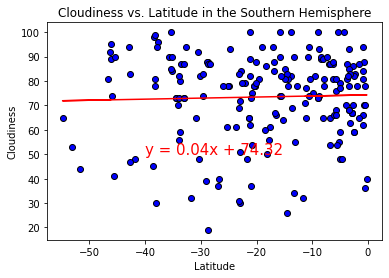

<Figure size 432x288 with 0 Axes>

In [23]:
# Find the linear regression model
southern_latitude = southern_hem_df["Latitude"]
southern_cloudiness = southern_hem_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_latitude, southern_cloudiness)
regress_values = southern_latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the results in a scatter plot
plt.scatter(southern_latitude, southern_cloudiness, edgecolors = 'black', color = 'blue')
plt.plot(southern_latitude,regress_values,"r-", color = "red")
plt.annotate(line_eq, (-40,50), fontsize=15, color ="red")
plt.title("Cloudiness vs. Latitude in the Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-squared value is {rvalue**2}")
plt.show()

# Save as png
plt.savefig("Sou_Lat_Cloud.png")

This linear regression model is showing that there is a positive relationship between latitude and cloudiness in the southern hemisphere. Since the r-squared value is 0.03, this indicates that the model shown is not a good fit for the data set, meaning that the majority of data points are not falling close to the fitted regression line.

# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared value is 0.0025264931173995964


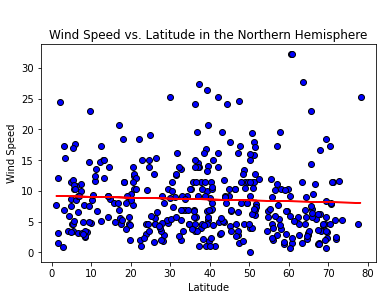

<Figure size 432x288 with 0 Axes>

In [24]:
# Find the linear regression model
northern_latitude = northern_hem_df["Latitude"]
northern_wind = northern_hem_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_latitude, northern_wind)
regress_values = northern_latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the results in a scatter plot
plt.scatter(northern_latitude, northern_wind, edgecolors = 'black', color = 'blue')
plt.plot(northern_latitude,regress_values,"r-", color = "red")
plt.annotate(line_eq, (20,38), fontsize=15, color ="red")
plt.title("Wind Speed vs. Latitude in the Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The r-squared value is {rvalue**2}")
plt.show()

# Save as png
plt.savefig("Nor_Lat_Wind.png")

This linear regression model is showing that there is a negative relationship between latitude and wind speed in the northern hemisphere. Since the r-squared value is 0.002, this indicates that the model shown is not a good fit for the data set, meaning that the majority of data points are not falling close to the fitted regression line.

#  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared value is 0.0010892032306529613


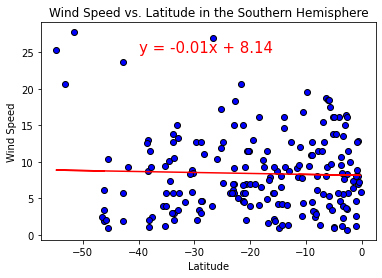

<Figure size 432x288 with 0 Axes>

In [25]:
# Find the linear regression model
southern_latitude = southern_hem_df["Latitude"]
southern_wind = southern_hem_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_latitude, southern_wind)
regress_values = southern_latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the results in a scatter plot
plt.scatter(southern_latitude, southern_wind, edgecolors = 'black', color = 'blue')
plt.plot(southern_latitude,regress_values,"r-", color = "red")
plt.annotate(line_eq, (-40,25), fontsize=15, color ="red")
plt.title("Wind Speed vs. Latitude in the Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The r-squared value is {rvalue**2}")
plt.show()

# Save as png
plt.savefig("Sou_Lat_Wind.png")

This linear regression model is showing that there is a negative relationship between latitude and wind speed in the southern hemisphere. Since the r-squared value is 0.13, this indicates that the model shown is not a good fit for the data set, meaning that the majority of data points are not falling close to the fitted regression line.